In [2]:
"""
Flat Dynamic run for ANDES, the following code is used to run a dynamic simulation of IEEE 14 bus system
"""

'\nFlat Dynamic run for ANDES, the following code is used to run a dynamic simulation of IEEE 14 bus system\n'

In [1]:
pwd

'c:\\Users\\alexb\\research\\WEC-GRID\\WEC_GRID\\notebooks'

In [4]:
import pandas as pd
import numpy as np
import andes

def generate_wind_velocity_data(resolution, length_sec, upper, lower):
    # Calculate total number of data points
    num_points = int(length_sec * resolution)
    
    # Time vector from 0 to 2*pi scaled according to the number of data points
    t = np.linspace(0, 2 * np.pi, num_points)
    
    # Generate a base sine wave to simulate natural wind speed variation
    base_speed = (upper - lower) / 2 * np.sin(t) + (upper + lower) / 2
    
    # Add random fluctuations to the base sine wave
    random_fluctuations = np.random.normal(0, (upper - lower) / 10, num_points)
    wind_speeds = base_speed + random_fluctuations
    
    # Ensure that wind speeds do not go beyond the upper and lower limits
    wind_speeds = np.clip(wind_speeds, lower, upper)
    
    # Generate timestamps starting from now, each point spaced according to the resolution
    time_range = pd.date_range(start=pd.Timestamp.now(), periods=num_points, freq=f'{int(3600/resolution)}S')
    
    # Create a DataFrame
    return pd.DataFrame({
        'timestamp': time_range,
        'wind_speed': wind_speeds
    })

# Simulation parameters
sim_parameters = {
    "Duration": 10.010,
    "Res": 0.0010,  # 1 ms resolution
    "Raw": "../models/grid_models/test_ieee14.raw",
    "Dyr": "../models/grid_models/test_ieee14.dyr"
}


In [5]:

# Generate wind velocity data
wind_velocity_data = generate_wind_velocity_data(resolution=sim_parameters["Res"] * 3600, length_sec=sim_parameters["Duration"], upper=25, lower=3)

# Load system model
ss = andes.load(sim_parameters["Raw"], addfile=sim_parameters["Dyr"], codegen=True, setup=False)
ss.setup()
ss.PFlow.config.method = "NR"
ss.PFlow.run()

# Time-domain simulation setup
ss.TDS.config.tf = sim_parameters["Duration"]
ss.TDS.config.no_tqdm = 1  # disable progress bar
ss.TDS.config.method = "trapezoid"
ss.TDS.config.honest = 0 # 
ss.TDS.config.qrt = 1
ss.TDS.config.refresh_event = 1
ss.TDS.config.linsolve = 1
ss.TDS.tstep = sim_parameters["Res"]

# Run simulation
ss.TDS.run()

# Plot results
fig, ax = ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0],
    greyscale=True,
    grid=True,
    set_ylim=True
)


Generating code for 97 models on 2 processes.


FileNotFoundError: [Errno 2] No such file or directory: '../models/grid_models\\test_ieee14.dyr'

In [ ]:
ss.

In [1]:
import andes
import numpy as np

%matplotlib inline

In [2]:
case_raw_path = "../models/grid_models/andes_IEEE14.raw"
case_dyr_path = "../models/grid_models/andes_IEEE14.dyr"

In [3]:
ss = andes.load(case_raw_path, addfile=case_dyr_path, codegen=True, setup=False)
ss.setup()

Generating code for 97 models on 2 processes.


True

In [5]:
ss.GENROU.D.v

array([0., 0., 0., 0., 0.])

In [8]:
ss.PFlow.config.method = "FNR"

In [9]:
temp = ss.Bus.as_df()
temp

,idx,u,name,Vn,vmax,vmin,v0,a0,xcoord,ycoord,area,zone,owner
uid,,,,,,,,,,,,,
0,1,1.0,BUS1,69.0,1.1,0.9,1.03000,0.000000,0,0,1,1,1
1,2,1.0,BUS2,69.0,1.1,0.9,1.01970,-0.027981,0,0,1,1,1
2,3,1.0,BUS3,69.0,1.1,0.9,1.00042,-0.060097,0,0,1,1,1
3,4,1.0,BUS4,69.0,1.1,0.9,0.99858,-0.074721,0,0,1,1,1
4,5,1.0,BUS5,69.0,1.1,0.9,1.00443,-0.064315,0,0,1,1,1
5,6,1.0,BUS6,138.0,1.1,0.9,0.99871,-0.109998,0,0,2,2,2
6,7,1.0,BUS7,138.0,1.1,0.9,1.00682,-0.084285,0,0,2,2,2
7,8,1.0,BUS8,69.0,1.1,0.9,1.01895,-0.024339,0,0,2,2,2
8,9,1.0,BUS9,138.0,1.1,0.9,1.00193,-0.127502,0,0,2,2,2


In [10]:
v = ss.Bus.v.

SyntaxError: invalid syntax (3666626792.py, line 1)

In [ ]:
ss.Bus.a.v.tolist()

[8.62306421756276e-20,
 -0.030788835410813082,
 -0.061734559533983005,
 -0.07696511657375284,
 -0.06707346141379646,
 -0.11262149580515253,
 -0.08526269311084723,
 -0.026877327688427047,
 -0.1264640546068234,
 -0.12942483891538137,
 -0.12356406899440636,
 -0.1304289708410981,
 -0.1347526370557193,
 -0.16547668478708175]

In [ ]:
??ss.PFlow.run

NameError: name 'ss' is not defined

Generating code for 97 models on 2 processes.
<Toggle Toggle_1>: Line.Line_6 status changed to 0 at t=1.0 sec.
<Toggle Toggle_2>: Line.Line_6 status changed to 1 at t=5.0 sec.


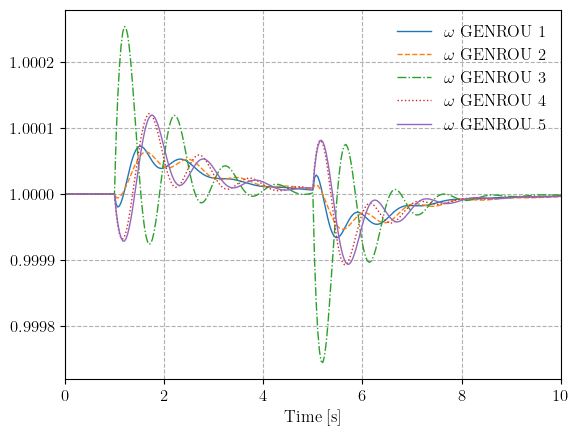

In [ ]:
# ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)
case_raw_path = "../models/grid_models/andes_IEEE14.raw"
case_dyr_path = "../models/grid_models/andes_IEEE14.dyr"

ss = andes.load(case_raw_path, addfile=case_dyr_path, codegen=True, setup=False)

ss.add("Toggle", dict(model="Line", dev="Line_6", t=1.0))
ss.add("Toggle", dict(model="Line", dev="Line_6", t=5.0))

ss.setup()  # no `ss.add()` calls are allowed after setup()

ss.PFlow.config.method = "NR"

ss.PFlow.run()
ss.TDS.config.tf = 10  # simulate for 3 mins 0 seconds to save time
ss.TDS.config.no_tqdm = 1  # disable progres bar printing
ss.TDS.config.method = "trapezoid"
ss.TDS.config.honest = 1
ss.TDS.config.qrt = 1
ss.TDS.config.refresh_event = 1
ss.TDS.config.linsolve = 1
ss.TDS.tstep = 1 / 120
ss.TDS.run()

fig, ax = ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0],
    # ycalc=lambda x: 60 * x,
    greyscale=True,
    grid=True,
    set_ylim=True,
)

In [ ]:
??ss.PFlow.run

Signature: ss.PFlow.run(**kwargs)
Source:   
    def run(self, **kwargs):
        """
        Solve the power flow using the selected method.

        Returns
        -------
        bool
            convergence status
        """

        system = self.system
        if self.config.check_conn == 1:
            self.system.connectivity()

        self.summary()
        self.init()

        if system.dae.m == 0:
            logger.error("Loaded case contains no power flow element.")
            system.exit_code = 1
            return False

        method = self.config.method.lower()

        t0, _ = elapsed()

        # ---------- Call solution methods ----------
        if method == 'nr':
            self.nr_solve()
        elif method == 'nk':
            self.newton_krylov()

        t1, s1 = elapsed(t0)
        self.exec_time = t1 - t0

        if not self.converged:
            if abs(self.mis[-1] - self.mis[-2]) < self.config.tol:
                max_idx = np.argmax(np.abs(system

In [ ]:
angle = np.array(ss.Bus.a.v)
angle

array([ 8.62306422e-20, -3.07888354e-02, -6.17345595e-02, -7.69651166e-02,
       -6.70734614e-02, -1.12621496e-01, -8.52626931e-02, -2.68773277e-02,
       -1.26464055e-01, -1.29424839e-01, -1.23564069e-01, -1.30428971e-01,
       -1.34752637e-01, -1.65476685e-01])

In [ ]:
voltages = np.array(ss.Bus.v.v)
voltages

array([1.03      , 1.03      , 1.01      , 1.01140345, 1.0172555 ,
       1.03      , 1.0224715 , 1.03      , 1.02176879, 1.01554206,
       1.01911514, 1.01740698, 1.01445023, 1.0163402 ])

<Toggle Toggle_1>: Line.Line_7 status changed to 0 at t=1.0 sec.
<Toggle Toggle_2>: Line.Line_7 status changed to 1 at t=5.0 sec.


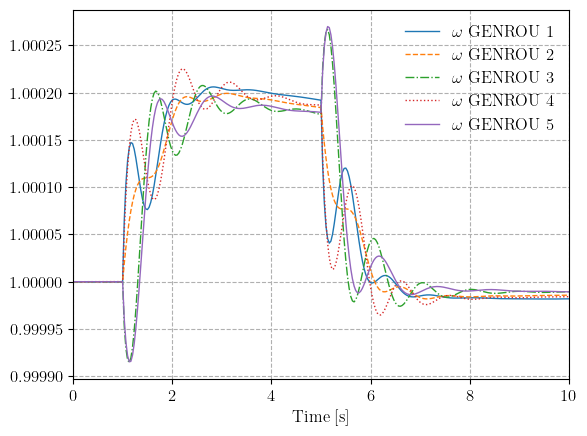

In [ ]:
ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)

ss.add("Toggle", dict(model="Line", dev="Line_7", t=1.0))
ss.add("Toggle", dict(model="Line", dev="Line_7", t=5.0))

ss.setup()  # no `ss.add()` calls are allowed after setup()

ss.PFlow.run()
ss.TDS.config.tf = 10  # simulate for 3 mins 0 seconds to save time
ss.TDS.config.no_tqdm = 1  # disable progres bar printing
ss.TDS.tstep = 1 / 120
ss.PFlow.run()
ss.TDS.run()

fig, ax = ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0],
    # ycalc=lambda x: 60 * x,
    greyscale=True,
    grid=True,
    set_ylim=True,
)

# # Add a legend. Update 'Bus location' with a more specific label if needed
# ax.set_ylabel('Frequency [Hz]')
# ax.set_ylim(bottom=59.94, top=60.04)
# fig.add_axes(ax)
# fig

In [ ]:
import andes
import numpy as np
from andes.utils.tsat import tsat_to_df, plot_comparison, run_cmp

ss = run_cmp(
    case_raw_path,
    dyr=case_dyr_path,
    fault_line="Line_7",
    t1=1.0,
    t2=5.0,
    tstep=1 / 120,
    tf=10,
)

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle Toggle_1>: Line.Line_7 status changed to 0 at t=1.0 sec.
<Toggle Toggle_2>: Line.Line_7 status changed to 1 at t=5.0 sec.


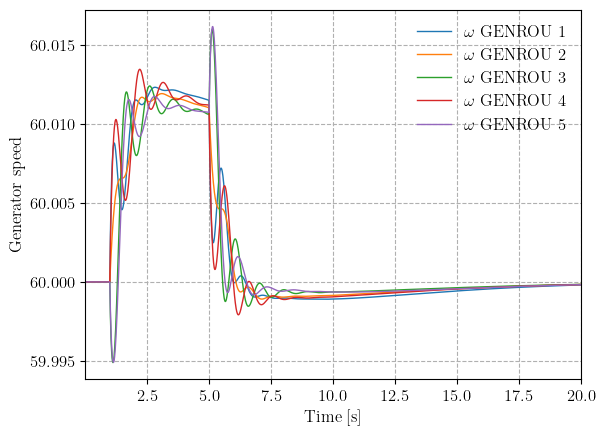

In [ ]:
fig, ax = ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    ylabel="Generator speed",
    greyscale=True,
    grid=True,
    linestyles=["-"],
    set_ylim=True,
)

In [ ]:
ss.Bus.as_df()

,idx,u,name,Vn,vmax,vmin,v0,a0,xcoord,ycoord,area,zone,owner
uid,,,,,,,,,,,,,
0,1,1.0,BUS1,69.0,1.1,0.9,1.03000,0.000000,0,0,1,1,1
1,2,1.0,BUS2,69.0,1.1,0.9,1.01970,-0.027981,0,0,1,1,1
2,3,1.0,BUS3,69.0,1.1,0.9,1.00042,-0.060097,0,0,1,1,1
3,4,1.0,BUS4,69.0,1.1,0.9,0.99858,-0.074721,0,0,1,1,1
4,5,1.0,BUS5,69.0,1.1,0.9,1.00443,-0.064315,0,0,1,1,1
5,6,1.0,BUS6,138.0,1.1,0.9,0.99871,-0.109998,0,0,2,2,2
6,7,1.0,BUS7,138.0,1.1,0.9,1.00682,-0.084285,0,0,2,2,2
7,8,1.0,BUS8,69.0,1.1,0.9,1.01895,-0.024339,0,0,2,2,2
8,9,1.0,BUS9,138.0,1.1,0.9,1.00193,-0.127502,0,0,2,2,2


In [ ]:
ss.Bus.

NumParam: Bus.u, v=[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], vin=[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

In [ ]:
ss.TDS.plotter.find("omega")

([6, 7, 8, 9, 10],
 ['omega GENROU 1',
  'omega GENROU 2',
  'omega GENROU 3',
  'omega GENROU 4',
  'omega GENROU 5'])

In [ ]:
ss.TDS.plotter.find("omega")

([6, 7, 8, 9, 10],
 ['omega GENROU 1',
  'omega GENROU 2',
  'omega GENROU 3',
  'omega GENROU 4',
  'omega GENROU 5'])

In [ ]:
import andes

%matplotlib inline
from andes.utils.paths import get_case

In [ ]:
# Define the paths to your RAW and DYR files
# case_raw_path = "../models/grid_models/11BUS KUNDUR.raw"
# case_dyr_path = "../models/grid_models/11BUS KUNDUR TGOV.dyr"
case_raw_path = "../models/grid_models/this_ieee14.raw"
case_dyr_path = "../models/grid_models/this_IEEE14 (1).dyr"

In [ ]:
# flat run
system = andes.run(case_raw_path, addfile=case_dyr_path, default_config=True)
# system.prepare()
# Assuming 'adaptive' is the method for variable time stepping and it's supported
# Set up the dynamic simulation parameters for variable time stepping
system.TDS.config.method = (
    "adaptive"  # Hypothetical setting to enable variable time stepping
)
system.TDS.config.tf = 60  # Simulation end time in seconds
# Hypothetical settings for adaptive time stepping, replace with actual parameters if available
system.TDS.config.tstep_init = 0.01  # Initial time step
system.TDS.config.tstep_min = 0.001  # Minimum time step
system.TDS.config.tstep_max = 0.1  # Maximum time step
system.TDS.config.err_tol = 1e-4  # Error tolerance for adaptive stepping

# Run the dynamic simulation with variable time stepping
system.TDS.run()

fig, ax = system.TDS.plotter.plot(
    system.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    greyscale=True,
    grid=True,
)

Working directory: "c:\Users\alexb\research\WEC-GRID\WEC_GRID\notebooks"
> Loaded generated Python code in "C:\Users\alexb\.andes\pycode".
Parsing input file "../models/grid_models/this_ieee14.raw"...
  IEEE 14 BUS TEST CASE
  DISTRIBUTED WITH ANDES (HTTPS://GITHUB.COM/CURENT/ANDES)
Input file parsed in 0.0624 seconds.
Parsing additional file "../models/grid_models\this_IEEE14 (1).dyr"...
Data file likely contains references to unsupported models.
['bus', 'subidx'] = [6, 1] not found in SynGen
Error parsing addfile "../models/grid_models\this_IEEE14 (1).dyr" with psse parser.


-> Single process exit with an error in 3.4062 seconds.


AttributeError: 'NoneType' object has no attribute 'TDS'

In [ ]:
system = andes.run(case_raw_path, addfile=case_dyr_path, default_config=True)
system.Line.alter("u", "Line_2", 0)
system.prepare()
# Assuming 'adaptive' is the method for variable time stepping and it's supported
# Set up the dynamic simulation parameters for variable time stepping
system.TDS.config.method = (
    "adaptive"  # Hypothetical setting to enable variable time stepping
)
system.TDS.config.tf = 60 * 2  # Simulation end time in seconds
# Hypothetical settings for adaptive time stepping, replace with actual parameters if available
system.TDS.config.tstep_init = 0.01  # Initial time step
system.TDS.config.tstep_min = 0.001  # Minimum time step
system.TDS.config.tstep_max = 0.1  # Maximum time step
system.TDS.config.err_tol = 1e-4  # Error tolerance for adaptive stepping

# Run the dynamic simulation with variable time stepping
system.TDS.run()

fig, ax = system.TDS.plotter.plot(
    system.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    greyscale=True,
    grid=True,
)

Data file likely contains references to unsupported models.
['bus', 'subidx'] = [6, 1] not found in SynGen
Error parsing addfile "../models/grid_models\this_IEEE14 (1).dyr" with psse parser.


-> Single process exit with an error in 1.2812 seconds.


AttributeError: 'NoneType' object has no attribute 'Line'

check the toggle
apply toggle and x time 
what is the affect of the toggle
what is the affect of the toggle
check on textbook (bemchmark purposes)



In [ ]:
ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)
idxes = ss.Line.idx.v
idxes

Working directory: "c:\Users\alexb\research\WEC-GRID\WEC_GRID\notebooks"
> Reloaded generated Python code of module "pycode".
Parsing input file "../models/grid_models/ieee14.raw"...
  IEEE 14 BUS TEST CASE
  03/06/14 CONTO           100.0  1962 W
Input file parsed in 0.0156 seconds.
Parsing additional file "../models/grid_models\IEEE14 (1).dyr"...
Addfile parsed in 0.5000 seconds.


['Line_1',
 'Line_2',
 'Line_3',
 'Line_4',
 'Line_5',
 'Line_6',
 'Line_7',
 'Line_8',
 'Line_9',
 'Line_10',
 'Line_11',
 'Line_12',
 'Line_13',
 'Line_14',
 'Line_15',
 'Line_16',
 'Line_17',
 'Line_18',
 'Line_19',
 'Line_20']

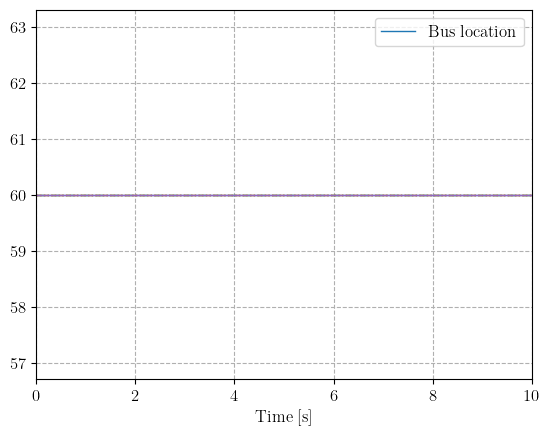

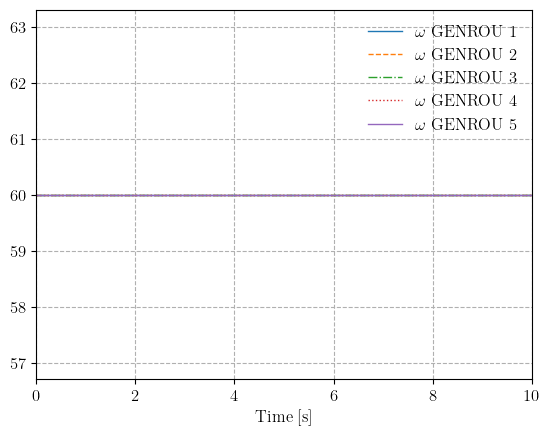

In [3]:
import andes

case_raw_path = "../models/grid_models/this_ieee14.raw"
case_dyr_path = "../models/grid_models/ieee14.dyr"

ss = andes.load(case_raw_path, addfile=case_dyr_path, setup=False)

# ss.add('Fault', dict(bus=2,tf=5.0, tc=5.2))

# ss.add('Toggle', dict(model="Line", dev='Line_2', t=1.0))
# ss.add('Toggle', dict(model="Line", dev='Line_2', t=5.0))

ss.setup()  # no `ss.add()` calls are allowed after setup()

ss.PFlow.run()
ss.TDS.config.tf = 10  # simulate for 3 mins 0 seconds to save time
ss.TDS.config.no_tqdm = 1  # disable progres bar printing
ss.TDS.run()

# fig, ax = ss.TDS.plotter.plot(ss.TDS.plotter.find('omega')[0],
#                               ycalc=lambda x: 60 * x,
#                               greyscale=True,
#                               grid=True)

fig, ax = ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0], ycalc=lambda x: 60 * x, greyscale=True, grid=True
)

# Add a legend. Update 'Bus location' with a more specific label if needed
ax.legend(["Bus location"], loc="best")

look at wind turbine model next, detail meeting about the model, 

action items:
    look at wind turbine model next, detail meeting about the model, 
    PSSE dynamcics 
    mistach? look into the exciter ot 

In [1]:
fig, ax = ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    greyscale=True,
    grid=True,
    legend=True,
    yheader=[
        "GENROU Bus 1",
        "GENROU Bus 2",
        "GENROU Bus 3",
        "GENROU Bus 6",
        "GENROU Bus 8",
    ],
)  # Custom legend text

NameError: name 'ss' is not defined

In [82]:
??ss.TDS.plotter.plot

Signature:
ss.TDS.plotter.plot(
    yidx,
    xidx=(0,),
    *,
    a=None,
    ytimes=None,
    ycalc=None,
    left=None,
    right=None,
    ymin=None,
    ymax=None,
    xlabel=None,
    ylabel=None,
    xheader=None,
    yheader=None,
    legend=None,
    grid=False,
    greyscale=False,
    latex=True,
    dpi=None,
    line_width=1.0,
    font_size=12,
    savefig=None,
    save_format=None,
    show=True,
    title=None,
    linestyles=None,
    use_bqplot=False,
    hline1=None,
    hline2=None,
    vline1=None,
    vline2=None,
    hline=None,
    vline=None,
    fig=None,
    ax=None,
    backend=None,
    set_xlim=True,
    set_ylim=True,
    autoscale=False,
    legend_bbox=None,
    legend_loc=None,
    legend_ncol=1,
    figsize=None,
    color=None,
    **kwargs,
)
Source:   
    def plot(self, yidx, xidx=(0,), *, a=None, ytimes=None, ycalc=None,
             left=None, right=None, ymin=None, ymax=None,
             xlabel=None, ylabel=None, xheader=None, yheader=None,


In [81]:
ss.BusFreq.WO_x

State: BusFreq.WO_x, a=[90 91 92], v=[0.07219089 0.07238684 0.07228252], e=[-1.41573310e-05 -1.52605901e-05 -1.50438220e-05]

AttributeError: 'GENROU' object has no attribute 'omega_GENROU_1'

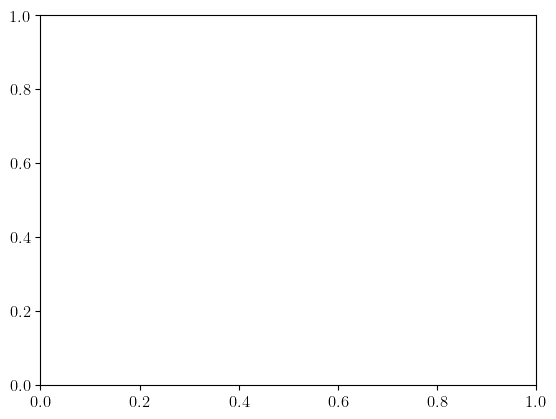

In [24]:
import andes
import matplotlib.pyplot as plt


# Plot omega for each GENROU and label them by bus number
fig, ax = plt.subplots()
for gen in ss.GENROU.uid:
    omega_var = getattr(ss.GENROU, f"omega_{gen}")
    bus_number = getattr(ss.GENROU, f"bus_{gen}")
    ax.plot(ss.TDS.t, 60 * omega_var, label=f"GENROU at Bus {bus_number}")

ax.grid(True)
ax.legend()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Frequency [Hz]")
plt.show()

In [52]:
ss.Bus.get

1.0297001849365799

In [28]:
getattr(ss.GENROU, f"omega ")

State: GENROU.omega, a=[5 6 7 8 9], v=[0.99999591 0.99999665 0.99999997 0.99999921 0.99999856], e=[2.87802872e-05 6.84742312e-05 2.42279672e-05 4.01331163e-05
 3.83898854e-05]

In [203]:
kundur = andes.utils.get_case("kundur/kundur_full.xlsx")
ss = andes.load(kundur, setup=False)
idxes = ss.Line.idx.v

results = dict()

for idx in idxes:
    ss = andes.load(kundur, setup=False)

    ss.add("Toggle", dict(model="Line", dev=idx, t=1.0))
    ss.add("Toggle", dict(model="Line", dev=idx, t=20.0))

    ss.setup()  # no `ss.add()` calls are allowed after setup()
    ss.Toggle.alter(
        "u", 1, 0.0
    )  # disable the existing Toggle with idx=1 (this is for the particular case)

    ss.PFlow.run()
    ss.TDS.config.tf = 40  # simulate for 5 seconds to save time
    ss.TDS.config.no_tqdm = 1  # disable progres bar printing
    ss.TDS.run()

    results[idx] = ss

<Toggle Toggle_2>: Line.Line_1 status changed to 0 at t=1.0 sec.
<Toggle Toggle_3>: Line.Line_1 status changed to 1 at t=20.0 sec.
<Toggle Toggle_2>: Line.Line_2 status changed to 0 at t=1.0 sec.
<Toggle Toggle_3>: Line.Line_2 status changed to 1 at t=20.0 sec.
<Toggle Toggle_2>: Line.Line_3 status changed to 0 at t=1.0 sec.
<Toggle Toggle_3>: Line.Line_3 status changed to 1 at t=20.0 sec.
<Toggle Toggle_2>: Line.Line_4 status changed to 0 at t=1.0 sec.
<Toggle Toggle_3>: Line.Line_4 status changed to 1 at t=20.0 sec.
<Toggle Toggle_2>: Line.Line_5 status changed to 0 at t=1.0 sec.
<Toggle Toggle_3>: Line.Line_5 status changed to 1 at t=20.0 sec.
<Toggle Toggle_2>: Line.Line_6 status changed to 0 at t=1.0 sec.
<Toggle Toggle_3>: Line.Line_6 status changed to 1 at t=20.0 sec.
<Toggle Toggle_2>: Line.Line_7 status changed to 0 at t=1.0 sec.
<Toggle Toggle_3>: Line.Line_7 status changed to 1 at t=20.0 sec.
<Toggle Toggle_2>: Line.Line_8 status changed to 0 at t=1.0 sec.
<Toggle Toggle_3>:

Violated stability criteria. To turn off, set [TDS].criteria = 0.
Simulation terminated at t=20.0318 s.


<Toggle Toggle_3>: Line.Line_11 status changed to 1 at t=20.0 sec.
<Toggle Toggle_2>: Line.Line_12 status changed to 0 at t=1.0 sec.


Violated stability criteria. To turn off, set [TDS].criteria = 0.
Simulation terminated at t=20.0318 s.


<Toggle Toggle_3>: Line.Line_12 status changed to 1 at t=20.0 sec.


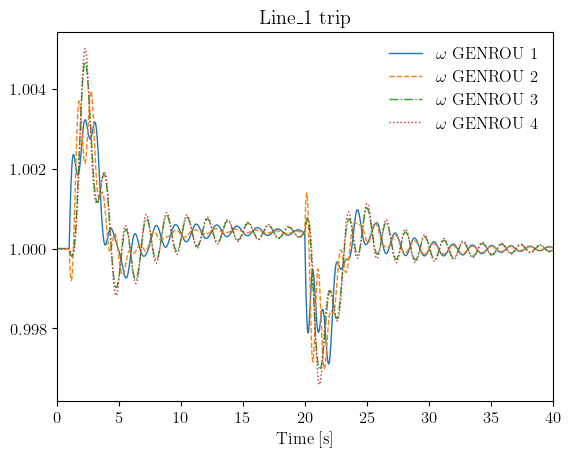

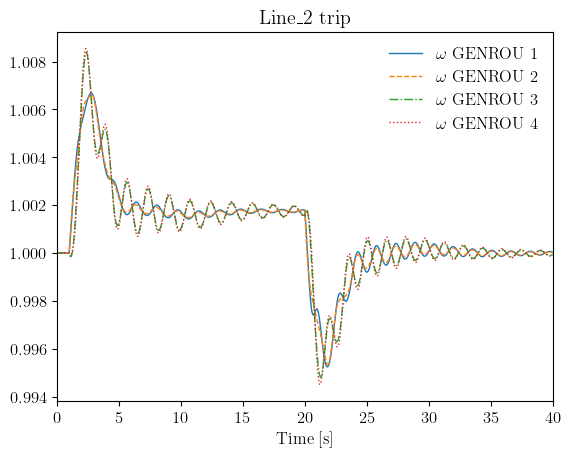

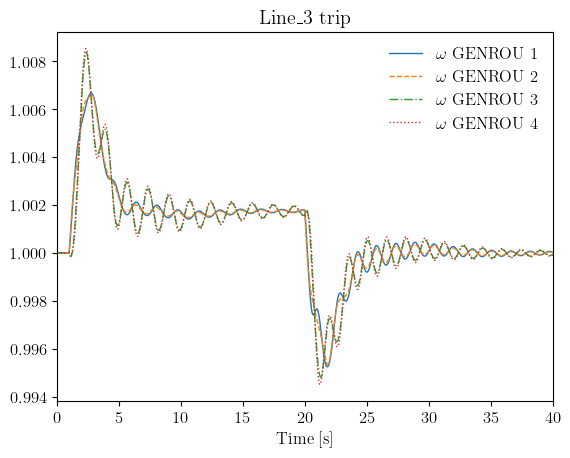

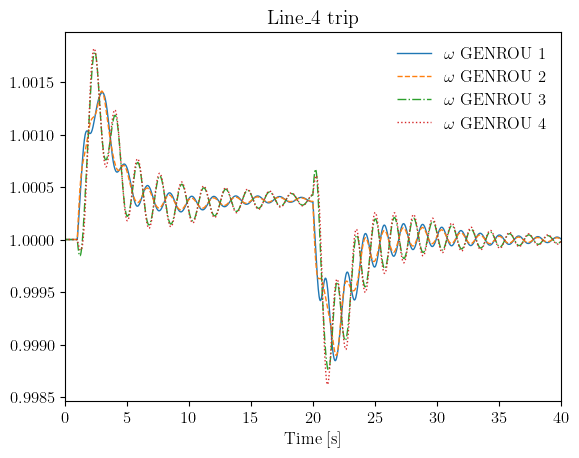

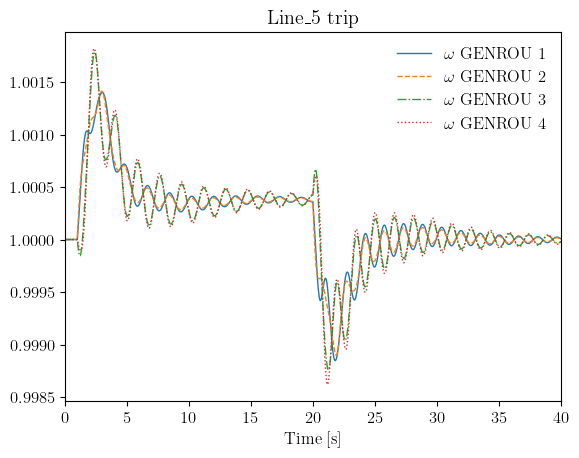

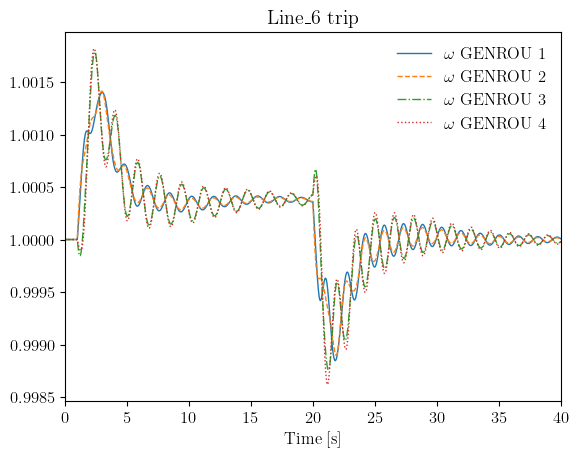

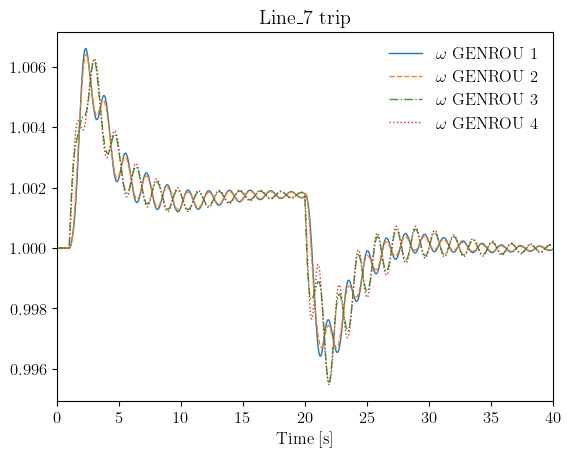

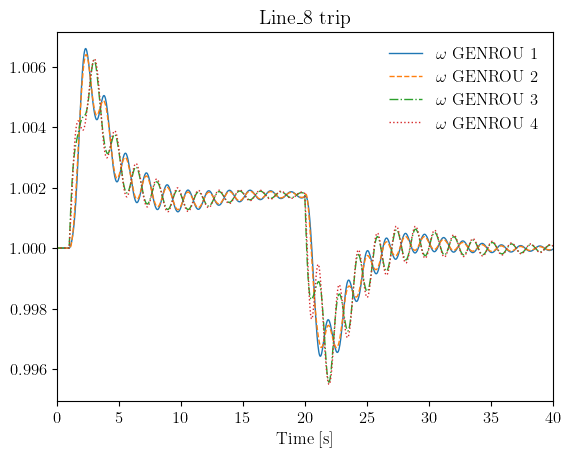

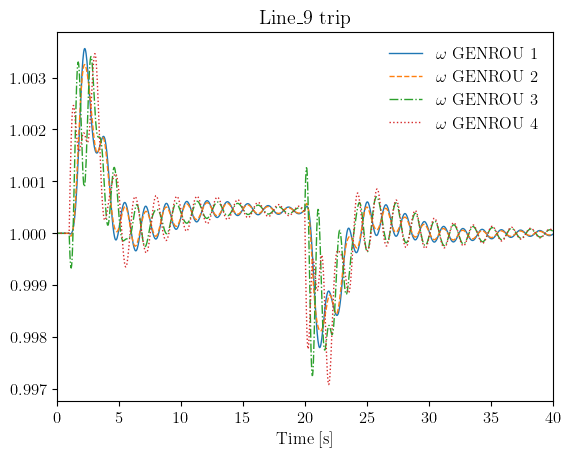

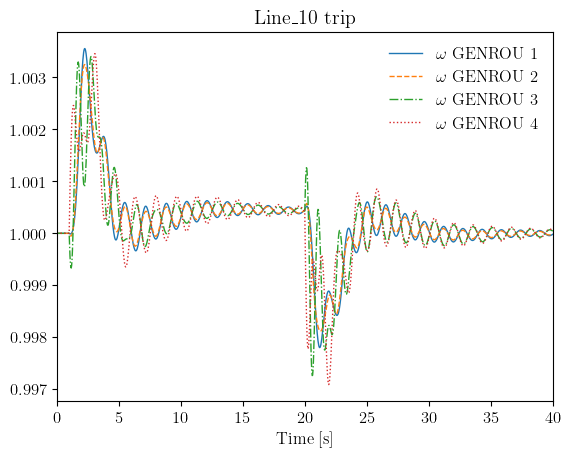

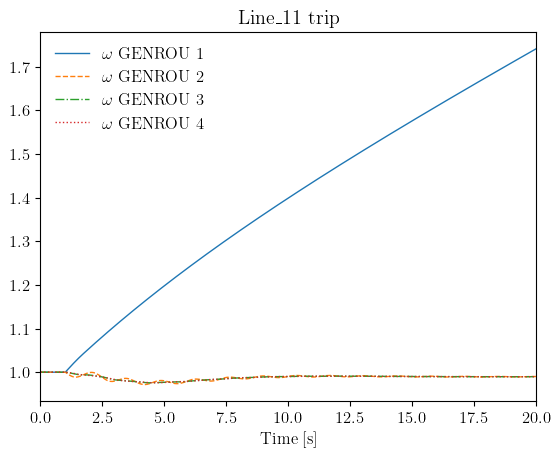

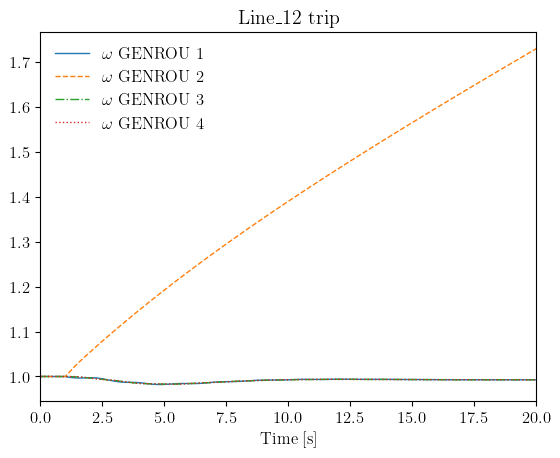

In [205]:
for idx, ss in results.items():
    # ss.TDS.plt.plot(ss.GENROU.omega, title=f'{idx} trip', latex=False, dpi=80)
    ss.TDS.plt.plot(ss.TDS.plt.find("omega")[0], title=f"{idx} trip")

In [191]:
results['Line_0'].

In [192]:
import andes
import numpy as np
from andes.utils.tsat import tsat_to_df, plot_comparison, run_cmp

andes.config_logger(stream_level=30)

In [193]:
# load scenario 1 data
omega_lt2 = tsat_to_df("omega_lt2s.xls")
v_lt2 = tsat_to_df("v_lt2s.xls")

# load scenario 2 data
omega_gt = tsat_to_df("omega_gt.xls")
v_gt = tsat_to_df("v_gt.xls")

FileNotFoundError: [Errno 2] No such file or directory: 'omega_lt2s.xls'

=============================================================================================

In [122]:
import andes
from andes.utils.paths import get_case

andes.config_logger()

In [123]:
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [125]:
ss = andes.load(get_case("kundur/kundur_full.xlsx"), default_config=True, setup=False)

Working directory: "c:\Users\alexb\research\WEC-GRID\WEC_GRID\notebooks"
> Reloaded generated Python code of module "pycode".
Parsing input file "c:\Users\alexb\miniconda3\envs\ANDES_1\lib\site-packages\andes\cases\kundur\kundur_full.xlsx"...
Input file parsed in 0.2031 seconds.


In [126]:
ss.Line.alter("u", "Line_3", 0)

In [127]:
ss.setup()

ss.PFlow.run()

System internal structure set up in 0.1249 seconds.
-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0156 seconds.
0: |F(x)| = 14.9282832
1: |F(x)| = 3.579044433
2: |F(x)| = 0.119268955
3: |F(x)| = 0.03278820195
4: |F(x)| = 2.880943096e-05
5: |F(x)| = 3.937117299e-11
Converged in 6 iterations in 0.0312 seconds.
Report saved to "kundur_full_out.txt" in 0.0000 seconds.


True

In [ ]:
# ANDES Power System modeling tool

In [23]:
%matplotlib inline

In [ ]:
# model referenc\e: https://docs.andes.app/en/latest/modelref.html

In [4]:
import andes
import numpy as np
from andes.utils.tsat import tsat_to_df, plot_comparison, run_cmp

andes.config_logger(stream_level=30)

In [7]:
ss = run_cmp(
    "../models/grid_models/IEEE14_v32.raw",
    dyr="../models/grid_models/ieee14.dyr",
    fault_line="Line_1",
    t1=1.0,
    t2=3.0,
    tstep=1 / 120,
)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 16 elements

In [24]:
import andes

%matplotlib inline
from andes.utils.paths import get_case

In [156]:
import andes
from andes.utils.paths import get_case

andes.config_logger(stream_level=20)

# Prepare the system
ss = andes.prepare(get_case("kundur/kundur_full.xlsx"), default_config=True)

# Suppose 'WTG_MODEL' is the placeholder for the wind turbine model you want to use
# And 'SYN_MODEL' is the placeholder for the synchronous generator model

# Remove the synchronous generator (assuming you know the ID)
# Repeat for each generator you want to replace
ss.remove("GENROU_7", "5")

# Add the wind turbine model at the same bus
# The parameters here are placeholders and must be provided correctly
ss.add("IEEEG1", bus="5", Sn="rated_power")

# Re-run power flow to get the initial conditions for dynamic simulation
ss.runpf()

# Set the simulation time and run the dynamic simulation
ss.TDS.config.tf = 60
ss.runtds()

# Plot the results
ss.TDS.plot()


# time step range ****************************************

Numerical code generation (full mode) started...


Generating code for 97 models on 2 processes.


Saved generated pycode to "C:\Users\alexb\.andes\pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 97 models in 13.2655 seconds.


AttributeError: 'System' object has no attribute 'remove'

In [25]:
andes.config_logger(stream_level=20)

In [26]:
ss = andes.run(get_case("kundur/kundur_full.xlsx"), default_config=True)

Working directory: "c:\Users\alexb\research\WEC-GRID\WEC_GRID\notebooks"
> Reloaded generated Python code of module "pycode".
Parsing input file "c:\Users\alexb\miniconda3\envs\ANDES_1\lib\site-packages\andes\cases\kundur\kundur_full.xlsx"...
Input file parsed in 0.0937 seconds.
System internal structure set up in 0.0625 seconds.
-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0156 seconds.
0: |F(x)| = 14.9282832
1: |F(x)| = 3.608627841
2: |F(x)| = 0.1701107882
3: |F(x)| = 0.002038626956
4: |F(x)| = 3.745104006e-07
Converged in 5 iterations in 0.0156 seconds.
Report saved to "kundur_full_out.txt" in 0.0000 seconds.


-> Single process finished in 0.5781 seconds.


In [ ]:
ss.

In [27]:
ss.TDS.config.tf = 60  # simulate for 10 seconds

In [28]:
ss.TDS.run()

Initialization for dynamics completed in 0.0624 seconds.
Initialization was successful.


  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle 1>: Line.Line_8 status changed to 0 at t=2.0 sec.


Simulation to t=60.00 sec completed in 5.7031 seconds.
Outputs to "kundur_full_out.lst" and "kundur_full_out.npz".
Outputs written in 0.1093 seconds.


True

In [29]:
ss.exit_code

0

In [30]:
ss.TDS.plt

In [31]:
ss.TDS.load_plotter()

In [32]:
??ss.TDS

Type:        TDS
String form: <andes.routines.tds.TDS object at 0x000002754D2D6D30>
File:        c:\users\alexb\miniconda3\envs\andes_1\lib\site-packages\andes\routines\tds.py
Source:     
class TDS(BaseRoutine):
    """
    Time-domain simulation routine.

    Some cases may be sensitive to large convergence tolerance ``config.tol``.
    If numerical oscillation happens, try reducing ``config.tol`` to ``1e-6``.
    """

    def __init__(self, system=None, config=None):
        super().__init__(system, config)
        self.config.add(OrderedDict((('method', 'trapezoid'),
                                     ('tol', 1e-4),
                                     ('t0', 0.0),
                                     ('tf', 20.0),
                                     ('fixt', 1),
                                     ('shrinkt', 1),
                                     ('honest', 0),
                                     ('tstep', 1/30),
                                     ('max_iter', 15),
     

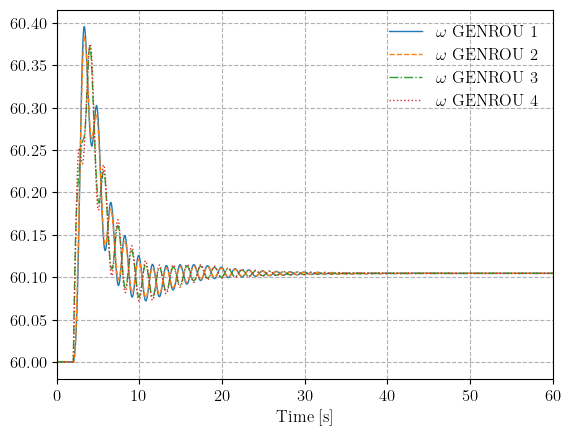

In [33]:
fig, ax = ss.TDS.plotter.plot(
    ss.TDS.plotter.find("omega")[0], ycalc=lambda x: 60 * x, greyscale=True, grid=True
)

In [3]:
import andes

# Define the paths to your RAW and DYR files
case_raw_path = "../models/grid_models/IEEE14_v32.raw"
case_dyr_path = "../models/grid_models/ieee14.dyr"

# Load the system with static and dynamic data and run power flow
system = andes.run(case_raw_path, addfile=case_dyr_path, default_config=True)

# If you want to proceed with dynamic simulation,
# ensure to prepare the system with dynamic data loaded
system.prepare()

# Setup the dynamic simulation parameters
system.TDS.config.tf = 10  # Set the simulation end time to 60 seconds

# Run the dynamic simulation
system.TDS.run()

# After running, you might want to plot results or analyze the output
# Example: system.plot(...)

Working directory: "c:\Users\alexb\research\WEC-GRID\WEC_GRID\notebooks"
> Reloaded generated Python code of module "pycode".
Parsing input file "../models/grid_models/IEEE14_v32.raw"...
  IEEE 14 BUS TEST CASE
  03/06/14 CONTO           100.0  1962 W
Input file parsed in 0.0312 seconds.
Parsing additional file "../models/grid_models\ieee14.dyr"...


ValueError: Length mismatch: Expected axis has 1 elements, new values have 16 elements

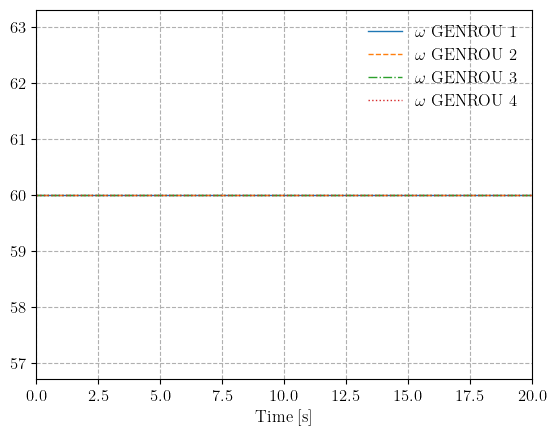

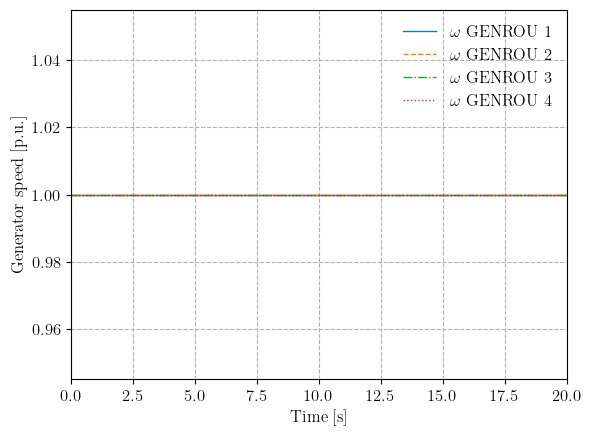

In [4]:
fig, ax = system.TDS.plotter.plot(
    system.TDS.plotter.find("omega")[0],
    ylabel="Generator speed [p.u.]",
    greyscale=True,
    grid=True,
)

In [39]:
ss.Bus.as_df()

,idx,u,name,Vn,vmax,vmin,v0,a0,xcoord,ycoord,area,zone,owner
uid,,,,,,,,,,,,,
0,1,1.0,1,20.0,1.1,0.9,1.00000,0.570255,0,0,1,1,1
1,2,1.0,2,20.0,1.1,0.9,0.99761,0.368746,0,0,1,1,1
2,3,1.0,12,20.0,1.1,0.9,0.96263,0.185317,0,0,2,1,1
3,4,1.0,11,20.0,1.1,0.9,0.81691,0.462359,0,0,2,1,1
4,5,1.0,101,230.0,1.1,0.9,0.97928,0.480203,0,0,1,1,1
5,6,1.0,102,230.0,1.1,0.9,0.95796,0.283887,0,0,1,1,1
6,7,1.0,3,230.0,1.1,0.9,0.93620,0.126901,0,0,1,1,1
7,8,1.0,13,230.0,1.1,0.9,0.87904,-0.080592,0,0,2,1,1
8,9,1.0,112,230.0,1.1,0.9,0.89054,0.093618,0,0,2,1,1


In [4]:
import andes

andes.config_logger()

In [1]:
import andes

# Use 'Qt5Agg', 'GTK3Agg', or another GUI backend if you prefer
from andes.utils.paths import get_case

In [104]:
import andes

# Define the paths to your RAW and DYR files
case_raw_path = "../models/grid_models/11BUS KUNDUR.raw"
case_dyr_path = "../models/grid_models/11BUS KUNDUR TGOV.dyr"

ss = andes.run(case_raw_path, addfile=case_dyr_path, default_config=True)

Working directory: "c:\Users\alexb\research\WEC-GRID\WEC_GRID\notebooks"
> Reloaded generated Python code of module "pycode".
Parsing input file "../models/grid_models/11BUS KUNDUR.raw"...
Input file parsed in 0.0156 seconds.
Parsing additional file "../models/grid_models\11BUS KUNDUR TGOV.dyr"...
Addfile parsed in 0.2812 seconds.
System internal structure set up in 0.0937 seconds.
-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0156 seconds.
0: |F(x)| = 0.0007530766237
1: |F(x)| = 6.218021653e-09
Converged in 2 iterations in 0.0156 seconds.
Report saved to "11BUS KUNDUR_out.txt" in 0.0000 seconds.


-> Single process finished in 0.7343 seconds.


In [105]:
ss.GENROU.M

NumParam: GENROU.M, v=[117.   117.   111.15 111.15], vin=[13.   13.   12.35 12.35]

In [106]:
ss.GENROU.M.v

array([117.  , 117.  , 111.15, 111.15])

In [107]:
ss.GENROU.M.vin

array([13.  , 13.  , 12.35, 12.35])

In [108]:
ss.GENROU.cache.df_in

,idx,u,name,bus,gen,coi,coi2,Sn,Vn,fn,...,gammaq,xd,xq,xd2,xq1,xq2,Td10,Td20,Tq10,Tq20
uid,,,,,,,,,,,,,,,,,,,,,
0,GENROU_1,1.0,GENROU_1,1,1,None,None,900.0,20.0,60.0,...,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05
1,GENROU_2,1.0,GENROU_2,2,2,None,None,900.0,20.0,60.0,...,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05
2,GENROU_3,1.0,GENROU_3,3,3,None,None,900.0,20.0,60.0,...,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05
3,GENROU_4,1.0,GENROU_4,4,4,None,None,900.0,20.0,60.0,...,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05


In [109]:
ss.GENROU.get("M", "GENROU_1", attr="vin")

13.0

In [110]:
ss.GENROU.alter("M", "GENROU_1", 10)

In [119]:
ss.PVD1.alter(src="pref0", idx="PVD_1", value=0.005)

KeyError: '<PVD1>: device not exist with idx=PVD_1.'

In [111]:
ss.GENROU.cache.refresh()

In [112]:
ss.GENROU.cache.df_in

,idx,u,name,bus,gen,coi,coi2,Sn,Vn,fn,...,gammaq,xd,xq,xd2,xq1,xq2,Td10,Td20,Tq10,Tq20
uid,,,,,,,,,,,,,,,,,,,,,
0,GENROU_1,1.0,GENROU_1,1,1,None,None,900.0,20.0,60.0,...,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05
1,GENROU_2,1.0,GENROU_2,2,2,None,None,900.0,20.0,60.0,...,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05
2,GENROU_3,1.0,GENROU_3,3,3,None,None,900.0,20.0,60.0,...,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05
3,GENROU_4,1.0,GENROU_4,4,4,None,None,900.0,20.0,60.0,...,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05


In [113]:
ss.TDS.run()

Initialization for dynamics completed in 0.1093 seconds.
Initialization was successful.


  0%|          | 0/100 [00:00<?, ?%/s]

Simulation to t=20.00 sec completed in 0.8124 seconds.
Outputs to "11BUS KUNDUR_out.lst" and "11BUS KUNDUR_out.npz".
Outputs written in 0.0000 seconds.


True

In [114]:
ss.dae.ts

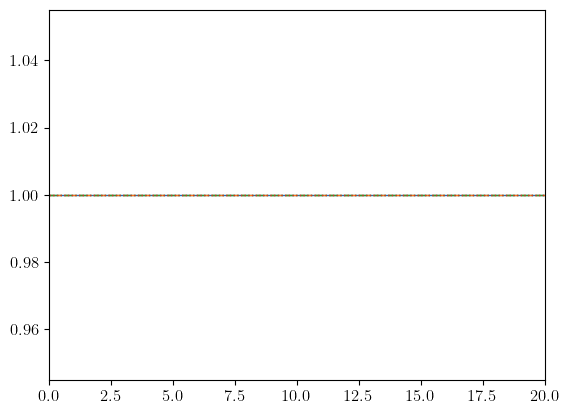

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [116]:
omega = ss.dae.ts.x[:, ss.GENROU.omega.a]
ss.TDS.plt.plot_data(ss.dae.ts.t, omega)

Working directory: "c:\Users\alexb\research\WEC-GRID\WEC_GRID\notebooks"
> Reloaded generated Python code of module "pycode".
Parsing input file "../models/grid_models/11BUS KUNDUR.raw"...
Input file parsed in 0.0156 seconds.
Parsing additional file "../models/grid_models\11BUS KUNDUR TGOV.dyr"...
Addfile parsed in 0.5156 seconds.
System internal structure set up in 0.0625 seconds.
-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0156 seconds.
0: |F(x)| = 0.0007530766237
1: |F(x)| = 6.218021653e-09
Converged in 2 iterations in 0.0000 seconds.
Report saved to "11BUS KUNDUR_out.txt" in 0.0000 seconds.
Numerical code generation (full mode) started...


-> Single process finished in 0.8593 seconds.
Generating code for 97 models on 2 processes.


Saved generated pycode to "C:\Users\alexb\.andes\pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 97 models in 66.6504 seconds.
Suspect initialization issue! Simulation may crash!

  Name   | Var. Value | Eqn. Mismatch
---------+------------+--------------
 a Bus 7 | 0.037      | -2.002       
 a Bus 8 | -0.205     | 1.954        
 v Bus 7 | 0.961      | -0.061       
 v Bus 8 | 0.949      | -0.243       


Initialization for dynamics completed in 0.0624 seconds.
Initialization failed!!
If you are developing a new model, check the initialization with
   andes -v 10 run -r tds --init ../models/grid_models/11BUS KUNDUR.raw
Otherwise, check the variables that are initialized out of limits.


  0%|          | 0/100 [00:00<?, ?%/s]

Simulation to t=180.00 sec completed in 14.9218 seconds.
Outputs to "11BUS KUNDUR_out.lst" and "11BUS KUNDUR_out.npz".
Outputs written in 0.3124 seconds.


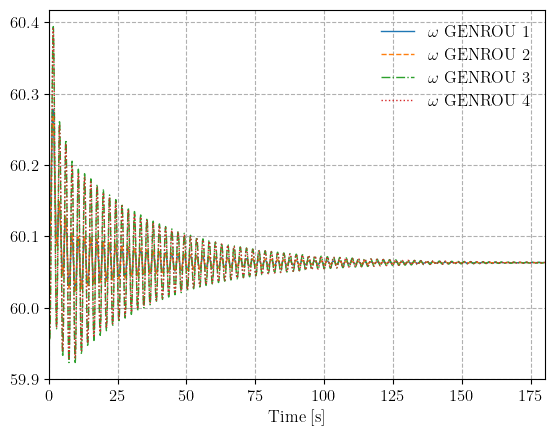

In [130]:
import andes

# Define the paths to your RAW and DYR files
case_raw_path = "../models/grid_models/11BUS KUNDUR.raw"
case_dyr_path = "../models/grid_models/11BUS KUNDUR TGOV.dyr"

# case_raw_path = "../models/grid_models/ieee14.raw"
# case_dyr_path = "../models/grid_models/IEEE14 (1).dyr"


# Load the system
system = andes.run(case_raw_path, addfile=case_dyr_path, default_config=True)


# # Parameters for the fault
# bus_number = 2  # The bus where the fault will be applied
# start_time = 6.0  # Time in seconds when the fault starts
# clear_time = 6.2  # Time in seconds when the fault is cleared
# x_f = 0.001       # Fault reactance in p.u.
# r_f = 0.0


# # Check if there's a direct method to add a fault in your version of ANDES
# # If such a method exists, it might look something like this:
# system.Fault.add(idx = 1, bus=bus_number, tf=start_time, tc=clear_time, xf=x_f, rf=r_f)


system.Line.alter("u", "Line_3", 0)
system.prepare()


# Assuming 'adaptive' is the method for variable time stepping and it's supported
# Set up the dynamic simulation parameters for variable time stepping
system.TDS.config.method = (
    "adaptive"  # Hypothetical setting to enable variable time stepping
)
system.TDS.config.tf = 60 * 3  # Simulation end time in seconds
# Hypothetical settings for adaptive time stepping, replace with actual parameters if available
system.TDS.config.tstep_init = 0.01  # Initial time step
system.TDS.config.tstep_min = 0.001  # Minimum time step
system.TDS.config.tstep_max = 0.1  # Maximum time step
system.TDS.config.err_tol = 1e-4  # Error tolerance for adaptive stepping

# Run the dynamic simulation with variable time stepping
system.TDS.run()
fig, ax = system.TDS.plotter.plot(
    system.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    greyscale=True,
    grid=True,
)

In [132]:
??system.Fault.add

Signature: system.Fault.add(**kwargs)
Source:   
    def add(self, **kwargs):
        """
        Add a device (an instance) to this model.

        Warnings
        --------
        This function is not intended to be used directly.
        Use the ``add`` method from System so that the index
        can be registered correctly.

        Parameters
        ----------
        kwargs
            model parameters are collected into the kwargs dictionary
        """
        idx = kwargs['idx']
        self.uid[idx] = self.n
        self.n += 1
        if "name" in self.params:
            name = kwargs.get("name")
            if (name is None) or (not isinstance(name, str) and np.isnan(name)):
                kwargs["name"] = idx

        if "idx" not in self.params:
            kwargs.pop("idx")

        for name, instance in self.params.items():
            value = kwargs.pop(name, None)
            instance.add(value)
        if len(kwargs) > 0:
            logger.warning("%s: unused d

In [152]:
import andes

# Define the paths to your RAW and DYR files
case_raw_path = "../models/grid_models/11BUS KUNDUR.raw"
case_dyr_path = "../models/grid_models/11BUS KUNDUR TGOV.dyr"

# Initialize the system without running setup implicitly
system = andes.System(case_raw_path, addfile=case_dyr_path)

# # Load system data
# system.load()

# # Correctly add the fault by unpacking the parameter dictionary
# param_dict = {
#     'idx': 0,
#     "bus": 4,
#     "tf": 1.0,
#     "tc": 1.5
# }
# # Unpack the dictionary to pass parameters correctly
# system.add(model="Fault", param_dict=param_dict)

# Proceed with setup and preparation for simulation
system.setup()
system.prepare()

# Setup the dynamic simulation parameters
ss.TDS.config.tf = 20  # Set the simulation end time to 60 seconds

# Run the dynamic simulation with the configured parameters
system.TDS.run()

# Plotting the results
fig, ax = system.TDS.plotter.plot(
    system.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    greyscale=True,
    grid=True,
)

> Reloaded generated Python code of module "pycode".
System internal structure set up in 0.0312 seconds.
Numerical code generation (full mode) started...


Generating code for 97 models on 2 processes.


Saved generated pycode to "C:\Users\alexb\.andes\pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 97 models in 66.9786 seconds.
Power flow not solved. Simulation will not continue.


AttributeError: 'NoneType' object has no attribute 'plot'

In [142]:
??system.add

Signature: system.add(model, param_dict=None, **kwargs)
Source:   
    def add(self, model, param_dict=None, **kwargs):
        """
        Add a device instance for an existing model.

        This methods calls the ``add`` method of `model` and registers the device `idx` to group.
        """
        if model not in self.models and (model not in self.model_aliases):
            logger.warning("<%s> is not an existing model.", model)
            return

        if self.is_setup:
            raise NotImplementedError("Adding devices are not allowed after setup.")

        group_name = self.__dict__[model].group
        group = self.groups[group_name]

        if param_dict is None:
            param_dict = {}
        if kwargs is not None:
            param_dict.update(kwargs)

        # remove `uid` field
        param_dict.pop('uid', None)

        idx = param_dict.pop('idx', None)
        if idx is not None and (not isinstance(idx, str) and np.isnan(idx)):
            idx = None

  

In [93]:
# Parameters for the faulta
bus_number = 2  # The bus where the fault will be applied
start_time = 1.0  # Time in seconds when the fault starts
clear_time = 1.1  # Time in seconds when the fault is cleared

# Check if there's a direct method to add a fault in your version of ANDES
# If such a method exists, it might look something like this:
system.Fault.add(idx=0, bus=bus_number, tf=start_time, tc=clear_time)

In [135]:
param_dict = {"bus": 2, "tf": 1.0, "tc": 1.5}
system.add(model="Fault", param_dict=param_dict)

NotImplementedError: Adding devices are not allowed after setup.

In [36]:
fault_params = {
    "bus": 3,  # The bus index where the fault is applied
    "tf": 1,  # Fault start time in seconds
    "tc": 1.1,  # Fault clearance time in seconds
    "xf": 0.001,  # Fault reactance in p.u.
    "rf": 0.0,  # Fault resistance in p.u., often set to a very low value
}
system.TimedEvent.add_model(name="Fault", instance=fault_params)

KeyError: 'TimedEvent: Duplicate model registration of Fault'

In [32]:
??system.TimedEvent.add_model

Signature: system.TimedEvent.add_model(name: str, instance)
Source:   
    def add_model(self, name: str, instance):
        """
        Add a Model instance to group.

        Parameters
        ----------
        name : str
            Model name
        instance : Model
            Model instance

        Returns
        -------
        None
        """
        if name not in self.models:
            self.models[name] = instance
        else:
            raise KeyError(f"{self.class_name}: Duplicate model registration of {name}")
File:      c:\users\alexb\miniconda3\envs\andes_1\lib\site-packages\andes\models\group.py
Type:      method

In [20]:
system.TimedEvent.add(idx=0, model="Fault", tf=0.1, tc=0.2)

TypeError: add() got an unexpected keyword argument 'tf'

In [153]:
fig, ax = system.TDS.plotter.plot(
    system.TDS.plotter.find("omega")[0],
    ycalc=lambda x: 60 * x,
    greyscale=True,
    grid=True,
)

AttributeError: 'NoneType' object has no attribute 'plot'

In [9]:
import andes

case_path = "../models/grid_models/11BUS KUNDUR.raw"
dyr_path = "../models/grid_models/11BUS KUNDUR TGOV.dyr"
ss = andes.run(case_path, addfile=dyr_path, routine="eig")

import numpy as np

eigs = ss.EIG.mu
eigs_sorted = np.sort_complex(eigs)
np.savetxt("eigs_tgov_andes.csv", eigs_sorted, delimiter=",")

# If you want to proceed with dynamic simulation,
# ensure to prepare the system with dynamic data loaded
ss.prepare()

# Setup the dynamic simulation parameters
ss.TDS.config.tf = 20  # Set the simulation end time to 60 seconds

# Run the dynamic simulation
ss.TDS.run()

eigs = ss.EIG.mu
eigs_sorted = np.sort_complex(eigs)
np.savetxt("eigs_tgov_andes.csv", eigs_sorted, delimiter=",")

Working directory: "c:\Users\alexb\research\WEC-GRID\WEC_GRID\notebooks"
> Reloaded generated Python code of module "pycode".
Parsing input file "../models/grid_models/11BUS KUNDUR.raw"...
Input file parsed in 0.0156 seconds.
Parsing additional file "../models/grid_models\11BUS KUNDUR TGOV.dyr"...
Addfile parsed in 0.8124 seconds.
System internal structure set up in 0.1406 seconds.
-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0000 seconds.
0: |F(x)| = 0.0007530766237
1: |F(x)| = 6.218021653e-09
Converged in 2 iterations in 0.0000 seconds.
Report saved to "11BUS KUNDUR_out.txt" in 0.0156 seconds.
Initialization for dynamics completed in 0.0781 seconds.
Initialization was successful.

-> Eigenvalue Analysis:
  Positive       0
  Zeros          1
  Negativ

-> Single process finished in 1.4999 seconds.
Generating code for 97 models on 2 processes.


Saved generated pycode to "C:\Users\alexb\.andes\pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 97 models in 88.6349 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-20 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


  0%|          | 0/100 [00:00<?, ?%/s]

Simulation to t=20.00 sec completed in 0.9531 seconds.
Outputs to "11BUS KUNDUR_out.lst" and "11BUS KUNDUR_out.npz".
Outputs written in 0.0156 seconds.


In [5]:
system.Bus.as_df()

,idx,u,name,Vn,vmax,vmin,v0,a0,xcoord,ycoord,area,zone,owner
uid,,,,,,,,,,,,,
0,1,1.0,1,1.0,1.1,0.9,1.04852,-0.146058,0,0,1,1,1
1,2,1.0,2,1.0,1.1,0.9,1.05160,-0.100739,0,0,1,1,1
2,3,1.0,3,1.0,1.1,0.9,1.03642,-0.150240,0,0,1,1,1
3,4,1.0,4,1.0,1.1,0.9,1.01685,-0.166019,0,0,1,1,1
4,5,1.0,5,1.0,1.1,0.9,1.01400,-0.147173,0,0,1,1,1
5,6,1.0,6,1.0,1.1,0.9,1.01090,-0.134982,0,0,1,1,1
6,7,1.0,7,1.0,1.1,0.9,1.00194,-0.172912,0,0,1,1,1
7,8,1.0,8,1.0,1.1,0.9,1.00180,-0.181563,0,0,1,1,1
8,9,1.0,9,1.0,1.1,0.9,1.03060,-0.177418,0,0,1,1,1


In [6]:
system.GENROU.as_df(vin=True)

,idx,u,name,bus,gen,coi,coi2,Sn,Vn,fn,...,gammaq,xd,xq,xd2,xq1,xq2,Td10,Td20,Tq10,Tq20
uid,,,,,,,,,,,,,,,,,,,,,
0,GENROU_2,1.0,GENROU_2,30,1,None,None,200.0,1.0,60.0,...,1.0,2.1340,2.0490,0.2240,0.4780,0.2240,3.797,0.0330,0.4380,0.0700
1,GENROU_3,1.0,GENROU_3,31,2,None,None,100.0,1.0,60.0,...,1.0,1.7241,1.6587,0.2029,0.4524,0.2029,3.826,0.0225,0.5084,0.0225
2,GENROU_4,1.0,GENROU_4,32,3,None,None,200.0,1.0,60.0,...,1.0,1.8700,1.7400,0.2805,0.4670,0.2805,6.700,0.0350,0.4100,0.0700
3,GENROU_5,1.0,GENROU_5,33,4,None,None,200.0,1.0,60.0,...,1.0,1.8600,1.8100,0.2330,0.4660,0.2330,5.800,0.0350,1.2000,0.0540
4,GENROU_6,1.0,GENROU_6,34,5,None,None,100.0,1.0,60.0,...,1.0,1.7241,1.6587,0.2029,0.4524,0.2029,3.826,0.0316,0.5084,0.0592
5,GENROU_7,1.0,GENROU_7,35,6,None,None,200.0,1.0,60.0,...,1.0,1.8340,1.7980,0.3140,0.8300,0.3140,5.318,0.0530,0.9700,0.0390
6,GENROU_8,1.0,GENROU_8,36,7,None,None,200.0,1.0,60.0,...,1.0,1.8400,1.7700,0.2150,0.4780,0.2150,3.800,0.0340,0.5200,0.0582
7,GENROU_9,1.0,GENROU_9,37,8,None,None,200.0,1.0,60.0,...,1.0,1.8400,1.7700,0.2150,0.4780,0.2150,3.800,0.0340,0.5200,0.0582
8,GENROU_10,1.0,GENROU_10,38,9,None,None,200.0,1.0,60.0,...,1.0,1.6430,1.5730,0.2460,0.4793,0.2460,7.610,0.0430,0.8400,0.0650


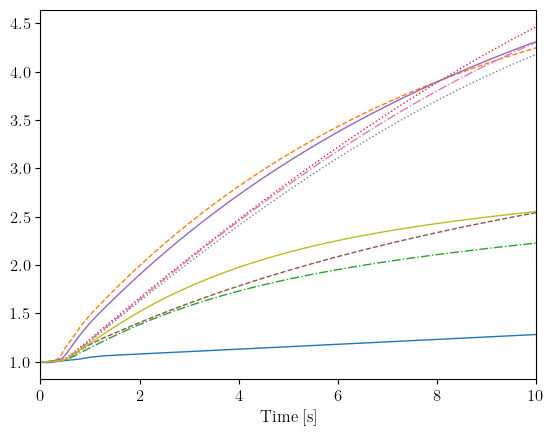

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [13]:
system.TDS.load_plotter()
system.TDS.plotter.plot(system.GENROU.omega)

In [11]:
%matplotlib inline

In [52]:
system.TDS.plt.find("omega")[0]

[2, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [46]:
system.TDS.plt.plot(
    yidx="Generator.speed",
    legend=True,
    grid=True,
    xlabel="Time (s)",
    ylabel="Speed (pu)",
)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

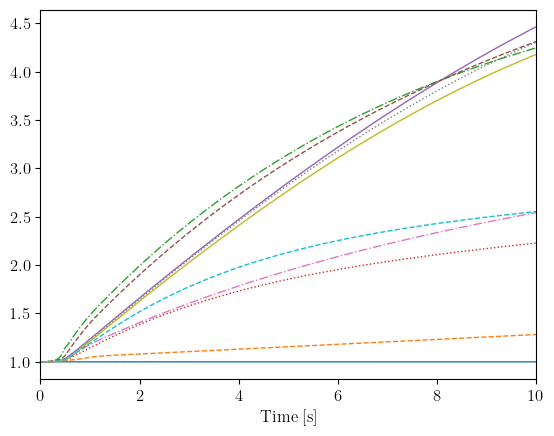

In [14]:
system.TDS.plt
system.TDS.load_plotter()
fig, ax = system.TDS.plt.plot(system.TDS.plt.find("omega")[0])

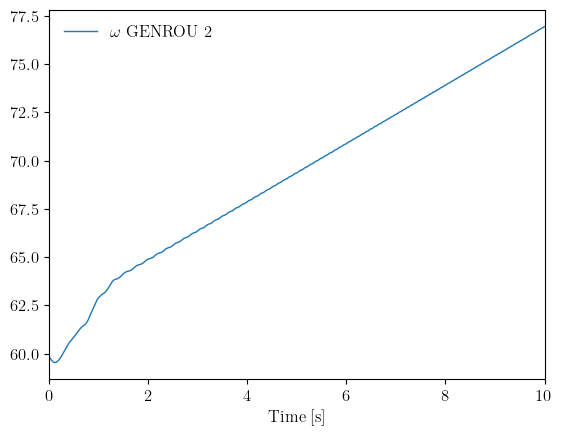

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [16]:
system.TDS.plotter.plot(
    system.GENROU.omega,
    a=(0,),
    ycalc=lambda x: 60 * x,
)

In [18]:
# Create a system object
system = andes.System()

andes.io.psse.read(system, file="../models/grid_models/Hawaii40_20231026.RAW")

True

In [19]:
andes.io.psse.read_add(system, file="../models/grid_models/Hawaii40_20231026.dyr")

REECA1: unused data {'Tprod': 0.026}
REECA1: unused data {'Tprod': 0.039}
REECA1: unused data {'Tprod': 0.029}
REECA1: unused data {'Tprod': 0.03}
REECA1: unused data {'Tprod': 0.025}
REECA1: unused data {'Tprod': 0.026}
REECA1: unused data {'Tprod': 0.026}
REECA1: unused data {'Tprod': 0.029}
REECA1: unused data {'Tprod': 0.025}
Error: <REPCA1> cannot retrieve <bus1> from <ACLine> using <line>:
  KeyError('Group <ACLine> does not contain device with idx=False')
Error: <REPCA1> cannot retrieve <bus2> from <ACLine> using <line>:
  KeyError('Group <ACLine> does not contain device with idx=False')
Error: <REPCA1> cannot retrieve <r> from <ACLine> using <line>:
  KeyError('Group <ACLine> does not contain device with idx=False')
Error: <REPCA1> cannot retrieve <x> from <ACLine> using <line>:
  KeyError('Group <ACLine> does not contain device with idx=False')


True

In [21]:
andes.config_logger(stream_level=20)

In [22]:
ss = andes.run(, default_config=True)

Working directory: "c:\Users\alexb\research\WEC-GRID\WEC_GRID\notebooks"


TypeError: object of type 'System' has no len()

In [4]:
ss.TDS.config.tf = 10  # simulate for 10 seconds

In [5]:
ss.TDS.run()

Initialization for dynamics completed in 0.1093 seconds.
Initialization was successful.


  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle 1>: Line.Line_8 status changed to 0 at t=2.0 sec.


Simulation to t=10.00 sec completed in 1.4375 seconds.
Outputs to "kundur_full_out.lst" and "kundur_full_out.npz".
Outputs written in 0.0156 seconds.


True

In [6]:
ss.exit_code

0

In [7]:
ss.TDS.plt

In [8]:
ss.TDS.load_plotter()

In [9]:
ss.TDS.plt.export_csv()

CSV data saved to "c:\Users\alexb\research\WEC-GRID\WEC_GRID\notebooks\kundur_full_out.csv".


'c:\\Users\\alexb\\research\\WEC-GRID\\WEC_GRID\\notebooks\\kundur_full_out.csv'

In [11]:
fig, ax = ss.TDS.plt.plot((5, 6, 7, 8), savefig=True)

Figure saved to "kundur_full_out_1.png".
c:\Users\alexb\miniconda3\envs\ANDES_1\lib\site-packages\andes\plot.py:822: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [10]:
plot()

NameError: name 'plot' is not defined

In [ ]:
fig.show()

C:\Users\alexb\AppData\Local\Temp\ipykernel_6604\89474557.py:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [154]:
fig, ax = ss.TDS.plotter.plot(
    (5, 6, 7, 8), ycalc=lambda x: 60 * x, greyscale=True, grid=True
)

AttributeError: 'NoneType' object has no attribute 'plot'